In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use( 'ggplot' ) 

In [2]:
import pandas 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.cross_validation import cross_val_predict, cross_val_score, StratifiedKFold
import numpy as np 
from scipy.stats import pearsonr

In [3]:
from sklearn.ensemble import BaggingRegressor

In [4]:
import pickle

In [5]:
# load in the pickled regression problems 

with open( 'combos.pkl', 'rb' ) as fn:
    combos = pickle.load( fn ) 
    
print( len( combos ) ) 

20


Using bagging

In [ ]:
en_preds = []

for nm, target, X, y, support in combos:
    net = ElasticNetCV( cv=10, max_iter=1e9 )
    bag = BaggingRegressor( net, n_estimators=100, n_jobs=-1, oob_score=True ) 
    bag.fit( X, y ) 
    oob_sc = bag.oob_score_  
    preds = bag.predict( X )
    score = pearsonr( preds, y ) 
    en_preds.append( ( nm, target, X, y, preds, score, bag, oob_sc ) ) 

Facet the data sets and targets 

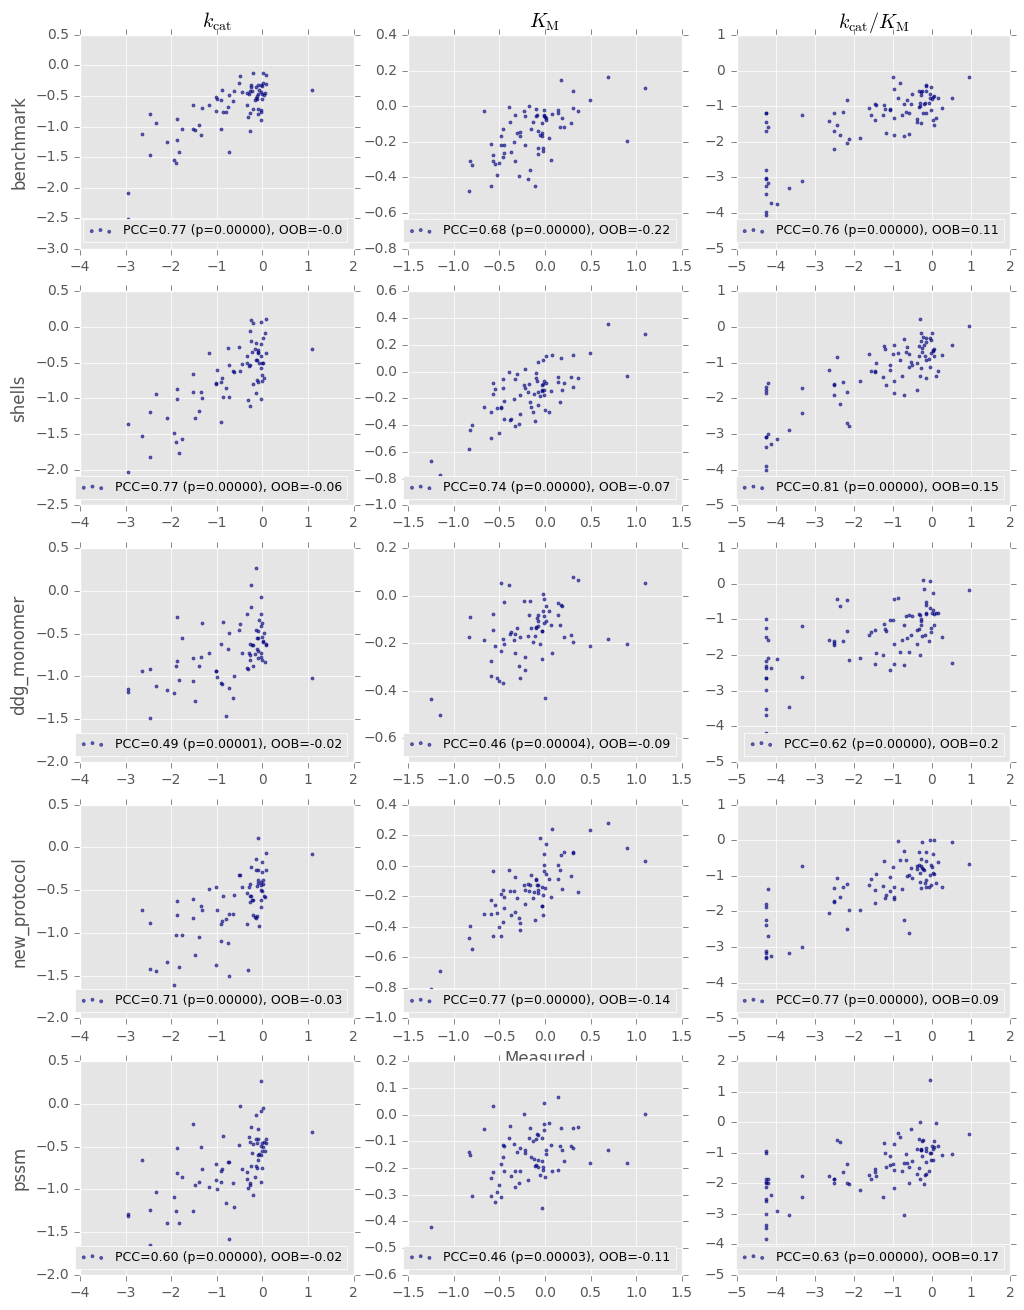

In [21]:
plt.figure( figsize=( 12, 16 ) ) 

for i, ( nm, target, X, y, preds, score, net, oob_sc ) in enumerate( en_preds ):
    
        plt.subplot( len( combos ) / 3, 3, i+1 )
        
        if i == 0:
            plt.title( '$k_{\mathrm{cat}}$' )
            plt.ylabel( nm ) 
        elif i == 1:
            plt.title( '\mathrm{K_M}$' )
        elif i == 2:
            plt.title( '$k_{\mathrm{cat}}/\mathrm{K_M}$' ) 
        elif i == 3:
            plt.title( '$T_m$' ) 

        elif i % 3 == 0:
            plt.ylabel( nm ) 
        elif i == 10:
            plt.xlabel( 'Measured' ) 
        else:
            pass
        
        plt.scatter( y, preds, marker='.', color='navy', alpha=.6 )
        plt.legend( [ 'PCC={0:.2f} (p={1:.5f}), OOB={2}'.format( *score, oob_sc.round(2) ) ], loc='lower right', fontsize='9' ) 
        
plt.show()

Cleaned up a little bit, and plotting the OOB samples 

/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/bagging.py:920: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


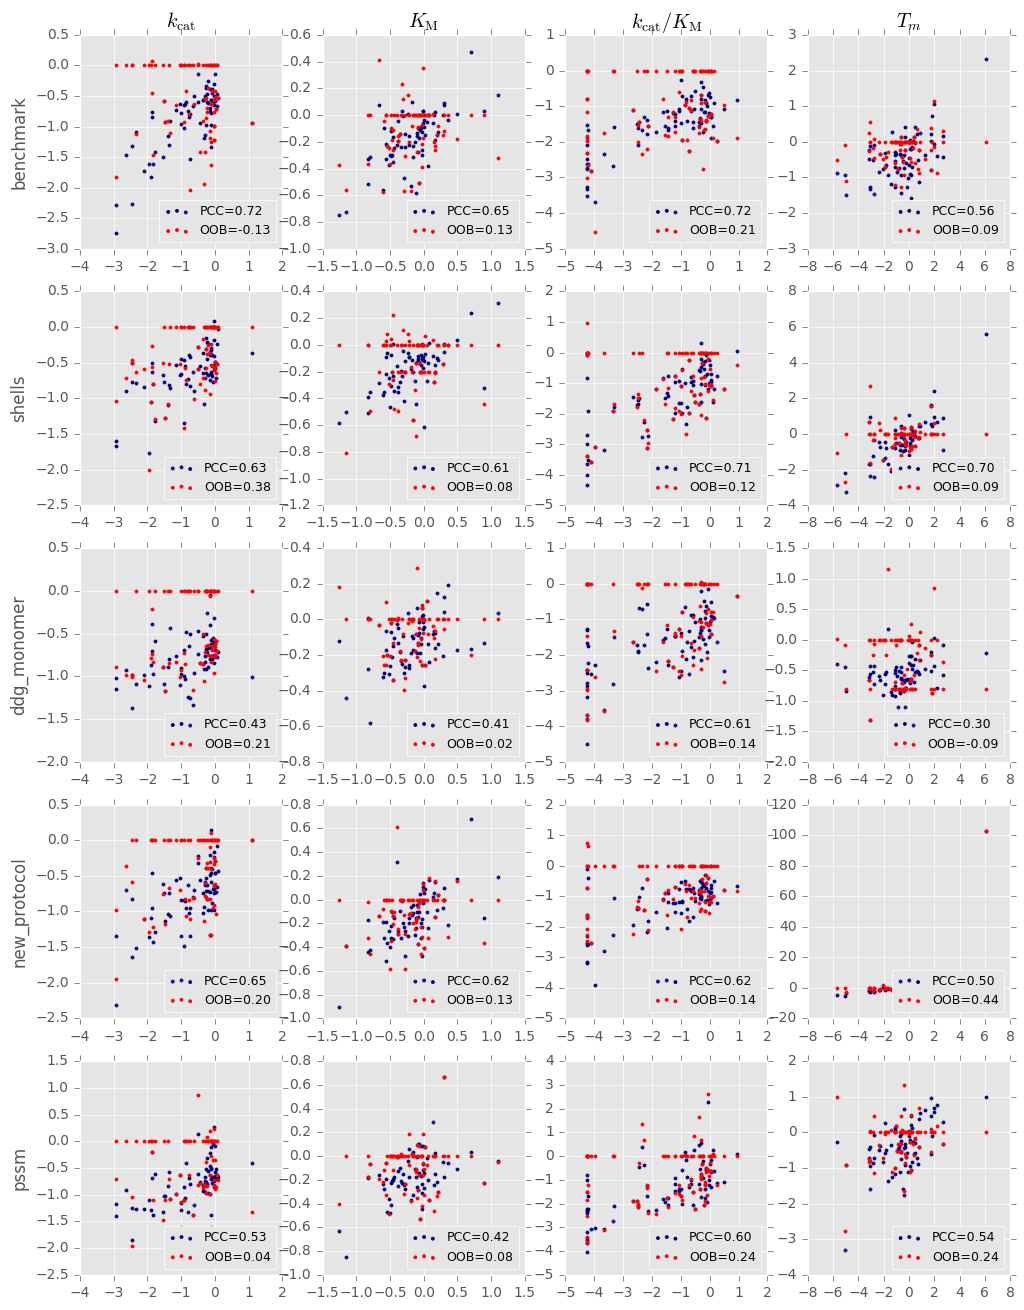

In [8]:
plt.figure( figsize=( 12, 16 ) ) 

for i, (nm, target, X, y, support) in enumerate( combos ):
    
    # fit 
    skf = StratifiedKFold( y, n_folds=10, shuffle=True ) 
    net = ElasticNetCV( cv=skf, max_iter=1e9, selection='random', l1_ratio=[.1, .5, .7, .9, .95, .99, 1] )
    bag = BaggingRegressor( net, n_estimators=2, n_jobs=-1, oob_score=True ) 
    bag.fit( X, y ) 
    oob_sc = bag.oob_score_  
    preds = bag.predict( X )
    score = pearsonr( y, preds ) 
    oob_preds = bag.oob_prediction_
    oob_r = pearsonr( y, oob_preds ) 
    
    # plot 
    plt.subplot( len( combos ) / 4, 4, i+1 )

    if i == 0:
        plt.title( '$k_{\mathrm{cat}}$' )
        plt.ylabel( nm ) 
    elif i == 1:
        plt.title( '$K_\mathrm{M}$' )
    elif i == 2:
        plt.title( '$k_{\mathrm{cat}}/K_\mathrm{M}$' ) 
    elif i == 3:
        plt.title( '$T_m$' ) 
    elif i % 4 == 0:
        plt.ylabel( nm ) 
#     elif i == 10:
#         plt.xlabel( 'Measured' ) 
#     else:
#         pass

    plt.scatter( y, preds, marker='.', color='navy', alpha=1 )
    plt.scatter( y, oob_preds, marker='.', color='red', alpha=1 ) 
    #plt.legend( [ 'PCC={0:.2f} (p={1:.5f}), OOB={2}'.format( *score, oob_sc.round(2) ) ], loc='lower right', fontsize='9' ) 
    plt.legend( [ 'PCC={0:.2f}'.format( score[0] ), 'OOB={0:.2f}'.format( oob_r[0] ) ], loc='lower right', fontsize='9' ) 
    
plt.show()